In [1]:
import os
import sys
os.path.dirname(sys.executable)

'D:\\Personal\\project_temp\\Acmi AI\\Image_Mask_manupulation\\venv\\Scripts'

In [2]:
import cv2
import numpy as np

In [41]:
path = "B3_May_25_2022_16-30_Ashik_Mostofa/B-3.1/images/1_s_144_F.jpg.png"

destination='reorganized/'

In [42]:
img = cv2.imread(path)

In [50]:
head_tail=os.path.split(path)
head_tail[0]
final_destination =os.path.join(destination,os.path.split(path)[0])
print(final_destination)
print(os.path.join(final_destination,head_tail[1]))
print (type(final_destination))

if os.path.exists(final_destination) == False :
    try:
        os.makedirs(os.path.join(final_destination), exist_ok=True)
    except OSError as error:
        print(error)


reorganized/B3_May_25_2022_16-30_Ashik_Mostofa/B-3.1/images
reorganized/B3_May_25_2022_16-30_Ashik_Mostofa/B-3.1/images\1_s_144_F.jpg.png
<class 'str'>


In [4]:

print(img.shape)
a= np.array(img)
print(a.ndim)
print('Maximum RGB value in this image {}'.format(img.max()))
print('Minimum RGB value in this image {}'.format(img.min()))
(B, G, R) = cv2.split(img)
print(R.min())
print(f"type:{type(R)} shape: {R.shape}")

(1425, 1900, 3)
3
Maximum RGB value in this image 44
Minimum RGB value in this image 0
42
type:<class 'numpy.ndarray'> shape: (1425, 1900)


In [5]:
# import glob
# import cv2
# cv_img = []
# for img in glob.glob("B3_May_25_2022_16-30_Ashik_Mostofa/B-3.1/images/*.png"):
#     n= cv2.imread(img)
#     cv_img.append(n)
# print(cv_img)


"""
import cv2
import glob

imdir = 'path/to/files/'
ext = ['png', 'jpg', 'gif']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

images = [cv2.imread(file) for file in files]

"""

# import cv2
# import glob

# imdir = 'B3_May_25_2022_16-30_Ashik_Mostofa/B-3.1/images/'
# ext = ['png', 'jpg', 'gif']    # Add image formats here

# files = []
# [files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

# images = [cv2.imread(file) for file in files]

# print(images)

"\nimport cv2\nimport glob\n\nimdir = 'path/to/files/'\next = ['png', 'jpg', 'gif']    # Add image formats here\n\nfiles = []\n[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]\n\nimages = [cv2.imread(file) for file in files]\n\n"

In [6]:
import cv2
import numpy as np
# from collections import Counter
import matplotlib.pyplot as plt

In [7]:
img = cv2.imread("B3_May_25_2022_16-30_Ashik_Mostofa/B-3.1/images/1_s_144_F.jpg.png" , cv2.IMREAD_UNCHANGED)
# img = cv2.imread("B3_May_25_2022_16-30_Ashik_Mostofa/B-3.1/images/465_s_163_M.jpg.png" , cv2.IMREAD_UNCHANGED)

In [8]:
print(img.shape)
a= np.array(img)
print(img.ndim)
print('Maximum RGB value in this image {}'.format(img.max()))
print('Minimum RGB value in this image {}'.format(img.min()))
(B, G, R) = cv2.split(img)
# test= Counter(R)
# print(test)

print(R.max())
print(R.min())

print(f"type:{type(R)} shape: {R.shape}")

(1425, 1900, 3)
3
Maximum RGB value in this image 44
Minimum RGB value in this image 0
44
42
type:<class 'numpy.ndarray'> shape: (1425, 1900)


(1425, 1900)
{0: 10281, 75: 793630, 255: 1903589}
{0: 10281, 75: 793630, 255: 1903589}
[  0  75 255]
3


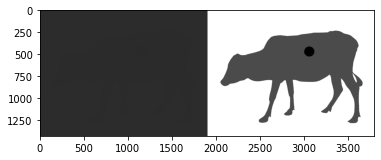

In [17]:
# image= cv2.imread('Tropical-tree.jpg')

# equ = cv2.equalizeHist(img)
equ = cv2.equalizeHist(R)
print(equ.shape)
res = np.hstack((R,equ)) #stacking images side-by-side
# cv2.imwrite('res.png',res)
un, cnt = np.unique(equ, return_counts=True)
counted_pixels= dict(zip(un, cnt))
print(dict(zip(un, cnt)))
print (counted_pixels)

print(un)
print(un.size)

plt.imshow(cv2.cvtColor(res , cv2.COLOR_BGR2RGB))
plt.show()


# cv2.imshow('dsa',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [31]:
frame=np.zeros(R.shape, dtype="uint8")
h,w = frame.shape

print(h,w)

1425 1900


In [23]:
#sort ascending order

sortlist = sorted(counted_pixels.items(), key=lambda x:x[1])
sortdict = dict(sortlist)
print(sortdict)
print(sortlist)

{0: 10281, 75: 793630, 255: 1903589}
[(0, 10281), (75, 793630), (255, 1903589)]


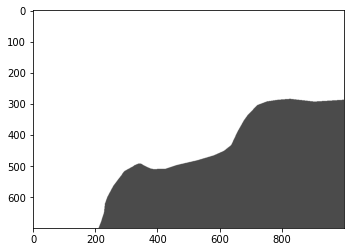

In [25]:
# equ[0:cY, 0:cX]

equ[0:700, 0:1000]


plt.imshow(cv2.cvtColor(equ[0:700, 0:1000] , cv2.COLOR_BGR2RGB))
plt.show()

In [34]:
def returnImageMarkers(sortedlist):
    stkr=sortedlist[0][0]
    cw=sortedlist[1][0]
    bg=sortedlist[2][0]

    return stkr , cw , bg
        
sticker, cow , background = returnImageMarkers(sortlist)
print( sticker, cow , background )


imagemap = {
    sticker:2,
    cow:1,
    background:0
}


0 75 255


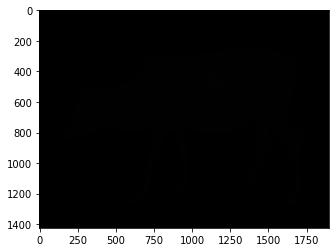

In [35]:
h,w = frame.shape

for x in range(w):
    for y in range(h):
        frame[y,x] = imagemap[equ[y,x]]


        


# equ[0:cY, 0:cX]
# equ[0:700, 0:1000]


plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))
plt.show()


In [36]:
frame.shape


(1425, 1900)

In [51]:
head_tail=os.path.split(path)
head_tail[0]
final_destination =os.path.join(destination,os.path.split(path)[0])
print(final_destination)
print(os.path.join(final_destination,head_tail[1]))
print (type(final_destination))

if os.path.exists(final_destination) == False :
    try:
        os.makedirs(os.path.join(final_destination), exist_ok=True)
    except OSError as error:
        print(error)

cv2.imwrite(os.path.join(final_destination,head_tail[1]), frame)

reorganized/B3_May_25_2022_16-30_Ashik_Mostofa/B-3.1/images
reorganized/B3_May_25_2022_16-30_Ashik_Mostofa/B-3.1/images\1_s_144_F.jpg.png
<class 'str'>


True

In [ ]:
os.path.split(path)